In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Twitter_Data.csv")

# Show first 5 rows
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [2]:
# Check shape and info
print("Shape:", df.shape)
df.info()


Shape: (162980, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [3]:
# Check for missing values
df.isnull().sum()


clean_text    4
category      7
dtype: int64

In [4]:
# Drop missing rows
df.dropna(inplace=True)

# Confirm shape again
print("Shape after dropping missing values:", df.shape)


Shape after dropping missing values: (162969, 2)


In [5]:
# Map numerical sentiment to text
df["sentiment"] = df["category"].map({
    -1.0: "Negative",
     0.0: "Neutral",
     1.0: "Positive"
})

# Drop the old category column
df.drop("category", axis=1, inplace=True)

# Preview
df.head()


,clean_text,sentiment
0,when modi promised “minimum government maximum...,Negative
1,talk all the nonsense and continue all the dra...,Neutral
2,what did just say vote for modi welcome bjp t...,Positive
3,asking his supporters prefix chowkidar their n...,Positive
4,answer who among these the most powerful world...,Positive


In [6]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+|www.\S+', '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    text = ' '.join(word for word in text.split() if word not in stop_words)  # remove stopwords
    return text

df["clean_text"] = df["clean_text"].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GUDIYA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # limit to top 5000 words

# Fit and transform text data
X = tfidf.fit_transform(df['clean_text']).toarray()

# Target variable
y = df['sentiment']


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)  # Encodes labels as 0, 1, 2


In [9]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [11]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8924035098484384

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      7152
           1       0.86      0.97      0.91     11067
           2       0.92      0.89      0.91     14375

    accuracy                           0.89     32594
   macro avg       0.89      0.88      0.88     32594
weighted avg       0.89      0.89      0.89     32594



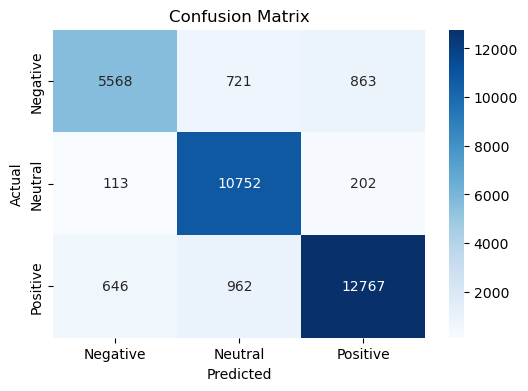

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get label names in same encoded order
labels = le.classes_

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [13]:
import joblib

# Save model
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']